In [1]:
import os
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import itertools
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

query_tx_url="https://api.covidtracking.com/v1/states/tx/daily.csv"
query_ny_url="https://api.covidtracking.com/v1/states/ny/daily.csv"
query_all_url="https://api.covidtracking.com/v1/states/daily.csv"

fileTLM1_to_load = "Resources/Texas Labor Market CES Data.csv"
fileTLM3_to_load = "Resources/Texas Labor Market LAUS Data.csv"

In [2]:
cols_imp = ["date","state","positive","totalTestResults"]
date_list = ["day","month","year"]

In [3]:
#Import Data for 50 states
covid_all_df = pd.read_csv(query_all_url)
covid_all_df = covid_all_df[cols_imp]

#Add month and year column
year = covid_all_df["date"].astype(str).str[:4]
month = covid_all_df["date"].astype(str).str[4:6:]
day = covid_all_df["date"].astype(str).str[6:]

#Columns for day, month, year
covid_all_df["day"] = day.astype("string") 
covid_all_df["month"] = month.astype("string") 
covid_all_df["year"] = year.astype("string") 

#Clean_data
covid_all_df= covid_all_df.dropna(how="any")

#for sorting by time
covid_all_df["date"] = month + day   
covid_all_df= covid_all_df.sort_values(by="date",axis=0,ascending=True,inplace=False,ignore_index=True)

covid_all_df.nunique()
covid_all_df.head()

,date,state,positive,totalTestResults,day,month,year
0,0229,WA,18.0,42.0,29,02,2020
1,0301,WA,34.0,117.0,01,03,2020
2,0301,MI,9.0,9.0,01,03,2020
3,0302,WA,65.0,305.0,02,03,2020
4,0302,RI,2.0,4.0,02,03,2020


In [4]:
#Import Texas 
covid_tx_df = pd.read_csv(query_tx_url)
covid_tx_df = covid_tx_df[["date","state","positive","totalTestResults"]]
#Import NY
covid_ny_df = pd.read_csv(query_ny_url)
covid_ny_df = covid_ny_df[["date","state","positive","totalTestResults"]]

#Merge TX and NY
merge_df = pd.merge(covid_tx_df, covid_ny_df, on="date", how = "inner")

#Add month and year column
year = merge_df["date"].astype(str).str[:4]
month = merge_df["date"].astype(str).str[4:6:]
day = merge_df["date"].astype(str).str[6:]

#Add columns
#date_val = pd.Series(date_list,dtype="str")
for i in date_list:
    i = pd.Series(i)
    i = i.astype("string")

#Columns for day, month, year
merge_df["day"] = day.astype("string") 
merge_df["month"] = month.astype("string") 
merge_df["year"] = year.astype("string") 

#for sorting by time
merge_df["date"] = month + day   
merge_df= merge_df.sort_values(by="date",axis=0,ascending=True,inplace=False,ignore_index=True)

merge_df.head()

,date,state_x,positive_x,totalTestResults_x,state_y,positive_y,totalTestResults_y,day,month,year
0,0304,TX,1,1,NY,6,54,04,03,2020
1,0305,TX,1,1,NY,22,98,05,03,2020
2,0306,TX,5,5,NY,33,125,06,03,2020
3,0307,TX,8,8,NY,76,168,07,03,2020
4,0308,TX,8,8,NY,105,197,08,03,2020


In [5]:
#eliminate unnecessary columns
reduced_df = merge_df.drop(columns ={"day","year","state_x","state_y"})

#Make Titles more descriptive
reduced_df = reduced_df.rename(columns={"positive_x":"tx_positive_tests", 
                                        "totalTestResults_x":"tx_total_tests",
                                        "positive_y":"ny_positive_tests",
                                        "totalTestResults_y":"ny_total_tests"})

reduced_df.head()

,date,tx_positive_tests,tx_total_tests,ny_positive_tests,ny_total_tests,month
0,0304,1,1,6,54,03
1,0305,1,1,22,98,03
2,0306,5,5,33,125,03
3,0307,8,8,76,168,03
4,0308,8,8,105,197,03


In [6]:
#column data to variables
tx_pos = reduced_df["tx_positive_tests"]
ny_pos = reduced_df["ny_positive_tests"]
tx_tot = reduced_df["tx_total_tests"]
ny_tot = reduced_df["ny_total_tests"]

#average monthly poitive test
tx_per_pos = (tx_pos/tx_tot)*100
ny_per_pos = (ny_pos/ny_tot)*100

#Add percent positive columns
reduced_df["tx_%_pos"] = tx_per_pos.round(2)
reduced_df["ny_%_pos"] = ny_per_pos.round(2)

#Create dataframes for other usage
stat_df = reduced_df.drop(columns = {})
charting_data = reduced_df.drop(columns = {"date"})

reduced_df.head()

,date,tx_positive_tests,tx_total_tests,ny_positive_tests,ny_total_tests,month,tx_%_pos,ny_%_pos
0,0304,1,1,6,54,03,100.0,11.11
1,0305,1,1,22,98,03,100.0,22.45
2,0306,5,5,33,125,03,100.0,26.40
3,0307,8,8,76,168,03,100.0,45.24
4,0308,8,8,105,197,03,100.0,53.30


In [7]:
#Texas
tx_tot = reduced_df["tx_total_tests"]
tx_pos = reduced_df["tx_positive_tests"]
tx_per_pos = reduced_df["tx_%_pos"]
#New York
ny_tot = reduced_df["ny_total_tests"]
ny_pos = reduced_df["ny_positive_tests"]
ny_per_pos = reduced_df["ny_%_pos"]

The mean of the Population is 1971969.8663366337
The median of the Population is 1243638.0
The mode of the Population is ModeResult(mode=array([1], dtype=int64), count=array([2]))


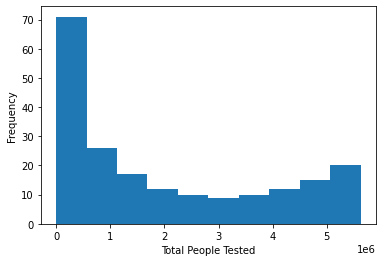

<Figure size 432x288 with 0 Axes>

Normality Test: NormaltestResult(statistic=80.53380122728464, pvalue=3.253173756346334e-18)


In [8]:
mean_numpy = np.mean(tx_tot)
print(f"The mean of the Population is {mean_numpy}")

median_numpy = np.median(tx_tot)
print(f"The median of the Population is {median_numpy}")

mode_scipy = sts.mode(tx_tot)
print(f"The mode of the Population is {mode_scipy}")

# Characterize the data set using matplotlib and stats.normaltest
plt.hist(tx_tot)
plt.xlabel('Total People Tested')
plt.ylabel('Frequency')
plt.figure()
plt.show()
print(f"Normality Test: {sts.normaltest(tx_tot)}")

In [9]:
output_path = os.path.join(".","Images","Frequency vs Total tests.png")
plt.savefig(output_path)

<Figure size 432x288 with 0 Axes>

The mean tests taken per day is 3546300.9702970297
The median of the tests taken per day is 2836820.0
The mode of the Population is ModeResult(mode=array([308], dtype=int64), count=array([2]))


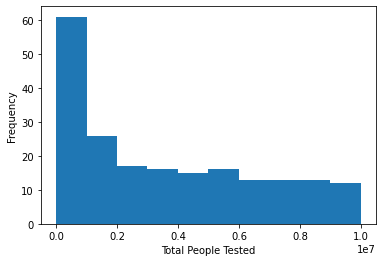

<Figure size 432x288 with 0 Axes>

Normality Test: NormaltestResult(statistic=50.854959969105764, pvalue=9.057028909834854e-12)


In [10]:
mean_numpy = np.mean(ny_tot)
print(f"The mean tests taken per day is {mean_numpy}")

median_numpy = np.median(ny_tot)
print(f"The median of the tests taken per day is {median_numpy}")

mode_scipy = sts.mode(ny_tot)
print(f"The mode of the Population is {mode_scipy}")

# Characterize the data set using matplotlib and stats.normaltest
plt.hist(ny_tot)
plt.xlabel('Total People Tested')
plt.ylabel('Frequency')
plt.figure()
plt.show()
print(f"Normality Test: {sts.normaltest(ny_tot)}")

In [11]:
output_path = os.path.join(".","Images","Frequency of combined.png")
plt.savefig(output_path)

<Figure size 432x288 with 0 Axes>

In [12]:
# Determine the quartiles and IQR
quantiles = tx_per_pos.quantile([.25,.5,.75])
Q1 =quantiles[0.25]
Q3 = quantiles[0.75]
iqr = Q3 -Q1

print(f"The lower quartile of positives is: {Q1}")
print(f"The upper quartile of positives is: {Q3}")
print(f"The interquartile range of positives is: {iqr}")
print(f"The the median of positives is: {quantiles[0.5]} ")

# Calculate the outlier boundaries

lower_bound = Q1 - (1.5*iqr)
upper_bound = Q3 + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Capture outliers in a new dataframe

outliers = tx_per_pos.loc[(tx_per_pos < lower_bound) | (tx_per_pos > upper_bound)]
outliers


The lower quartile of positives is: 7.4875
The upper quartile of positives is: 12.0275
The interquartile range of positives is: 4.54
The the median of positives is: 9.8 
Values below 0.6774999999999993 could be outliers.
Values above 18.8375 could be outliers.


0     100.0
1     100.0
2     100.0
3     100.0
4     100.0
5     100.0
6     100.0
7     100.0
8     100.0
9     100.0
10    100.0
11    100.0
12    100.0
Name: tx_%_pos, dtype: float64

In [13]:
# Determine the quartiles and IQR
quantiles = ny_per_pos.quantile([.25,.5,.75])
Q1 =quantiles[0.25]
Q3 = quantiles[0.75]
iqr = Q3 -Q1

print(f"The lower quartile of positives is: {Q1}")
print(f"The upper quartile of positives is: {Q3}")
print(f"The interquartile range of positives is: {iqr}")
print(f"The the median of positives is: {quantiles[0.5]} ")

# Calculate the outlier boundaries

lower_bound = Q1 - (1.5*iqr)
upper_bound = Q3 + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Capture outliers in a new dataframe

outliers = ny_per_pos.loc[(ny_per_pos < lower_bound) | (ny_per_pos > upper_bound)]
outliers


The lower quartile of positives is: 6.915000000000001
The upper quartile of positives is: 29.3125
The interquartile range of positives is: 22.3975
The the median of positives is: 13.11 
Values below -26.68125 could be outliers.
Values above 62.90875 could be outliers.


6    65.28
7    70.13
8    70.13
Name: ny_%_pos, dtype: float64

In [14]:
reduced_df["avg_%_pos"] = reduced_df[["tx_%_pos","ny_%_pos"]].mean(axis=1)
tx_ny_avg = reduced_df["avg_%_pos"]

print(f"Data Shape: {tx_ny_avg.shape}")
reduced_df.head()

Data Shape: (202,)


,date,tx_positive_tests,tx_total_tests,ny_positive_tests,ny_total_tests,month,tx_%_pos,ny_%_pos,avg_%_pos
0,0304,1,1,6,54,03,100.0,11.11,55.555
1,0305,1,1,22,98,03,100.0,22.45,61.225
2,0306,5,5,33,125,03,100.0,26.40,63.200
3,0307,8,8,76,168,03,100.0,45.24,72.620
4,0308,8,8,105,197,03,100.0,53.30,76.650


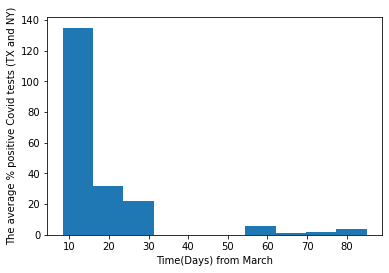

<Figure size 432x288 with 0 Axes>

The mean % Positive of TX and NY is: 17.03
The standard deviation of is: 14.97


In [15]:
plt.hist(tx_ny_avg)
plt.xlabel("Time(Days) from March")
plt.ylabel("The average % positive Covid tests (TX and NY)")
plt.figure()
plt.show()

print(f"The mean % Positive of TX and NY is: {round(tx_ny_avg.mean(),2)}")
print(f"The standard deviation of is: {round(tx_ny_avg.std(),2)}")

In [16]:
output_path = os.path.join('.',"Images","Combined TX-NY % positive.png")
plt.savefig(output_path)

<Figure size 432x288 with 0 Axes>